In [1]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Stock Price Data Analysis

In [2]:
# Define the stock ticker symbol
stock_symbol = 'AAPL'  # Example: Apple Inc.

# Fetch stock data
stock = yf.Ticker(stock_symbol)
df = stock.history(period="1y")  # Fetching data for the past 1 year
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-23 00:00:00-05:00,148.619295,150.986071,148.509906,150.230301,58301400,0.0,0.0
2022-11-25 00:00:00-05:00,147.485628,148.052467,146.302241,147.286743,35195900,0.0,0.0
2022-11-28 00:00:00-05:00,144.333235,145.824897,142.583023,143.418350,69246000,0.0,0.0
2022-11-29 00:00:00-05:00,143.487983,144.005097,139.569896,140.385330,83763800,0.0,0.0
2022-11-30 00:00:00-05:00,140.614031,147.893351,139.768765,147.207184,111380900,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-16 00:00:00-05:00,189.570007,190.960007,188.649994,189.710007,54412900,0.0,0.0
2023-11-17 00:00:00-05:00,190.250000,190.380005,188.570007,189.690002,50922700,0.0,0.0
2023-11-20 00:00:00-05:00,189.889999,191.910004,189.880005,191.449997,46505100,0.0,0.0


In [3]:
# Calculate moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA200
Date,,,,,,,,,
2022-11-23 00:00:00-05:00,148.619295,150.986071,148.509906,150.230301,58301400,0.0,0.0,NaN,NaN
2022-11-25 00:00:00-05:00,147.485628,148.052467,146.302241,147.286743,35195900,0.0,0.0,NaN,NaN
2022-11-28 00:00:00-05:00,144.333235,145.824897,142.583023,143.418350,69246000,0.0,0.0,NaN,NaN
2022-11-29 00:00:00-05:00,143.487983,144.005097,139.569896,140.385330,83763800,0.0,0.0,NaN,NaN
2022-11-30 00:00:00-05:00,140.614031,147.893351,139.768765,147.207184,111380900,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-11-16 00:00:00-05:00,189.570007,190.960007,188.649994,189.710007,54412900,0.0,0.0,176.472779,172.932152
2023-11-17 00:00:00-05:00,190.250000,190.380005,188.570007,189.690002,50922700,0.0,0.0,176.707668,173.130693
2023-11-20 00:00:00-05:00,189.889999,191.910004,189.880005,191.449997,46505100,0.0,0.0,176.954188,173.319737


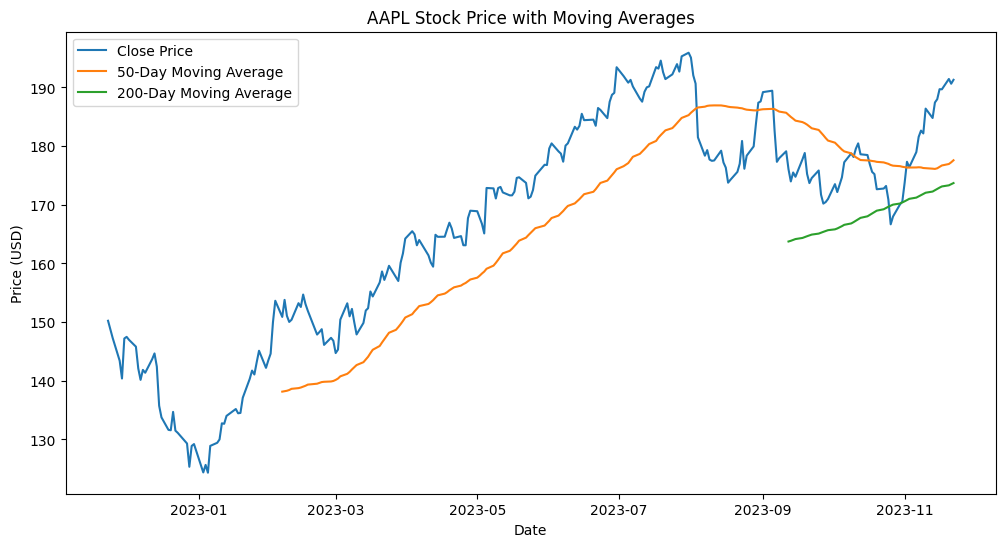

In [4]:
# Plotting
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA50'], label='50-Day Moving Average')
plt.plot(df['MA200'], label='200-Day Moving Average')
plt.title(f"{stock_symbol} Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

## Predicting Stock Prices Using Linear Regression

In [5]:
# Prepare data for Linear Regression
df['Price'] = df['Close']
df['Prediction'] = df['Close'].shift(-30)  # Predicting 30 days into future
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA200,Price,Prediction
Date,,,,,,,,,,,
2022-11-23 00:00:00-05:00,148.619295,150.986071,148.509906,150.230301,58301400,0.0,0.0,NaN,NaN,150.230301,129.426544
2022-11-25 00:00:00-05:00,147.485628,148.052467,146.302241,147.286743,35195900,0.0,0.0,NaN,NaN,147.286743,130.003342
2022-11-28 00:00:00-05:00,144.333235,145.824897,142.583023,143.418350,69246000,0.0,0.0,NaN,NaN,143.418350,132.748001
2022-11-29 00:00:00-05:00,143.487983,144.005097,139.569896,140.385330,83763800,0.0,0.0,NaN,NaN,140.385330,132.668457
2022-11-30 00:00:00-05:00,140.614031,147.893351,139.768765,147.207184,111380900,0.0,0.0,NaN,NaN,147.207184,134.010956
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-16 00:00:00-05:00,189.570007,190.960007,188.649994,189.710007,54412900,0.0,0.0,176.472779,172.932152,189.710007,NaN
2023-11-17 00:00:00-05:00,190.250000,190.380005,188.570007,189.690002,50922700,0.0,0.0,176.707668,173.130693,189.690002,NaN
2023-11-20 00:00:00-05:00,189.889999,191.910004,189.880005,191.449997,46505100,0.0,0.0,176.954188,173.319737,191.449997,NaN


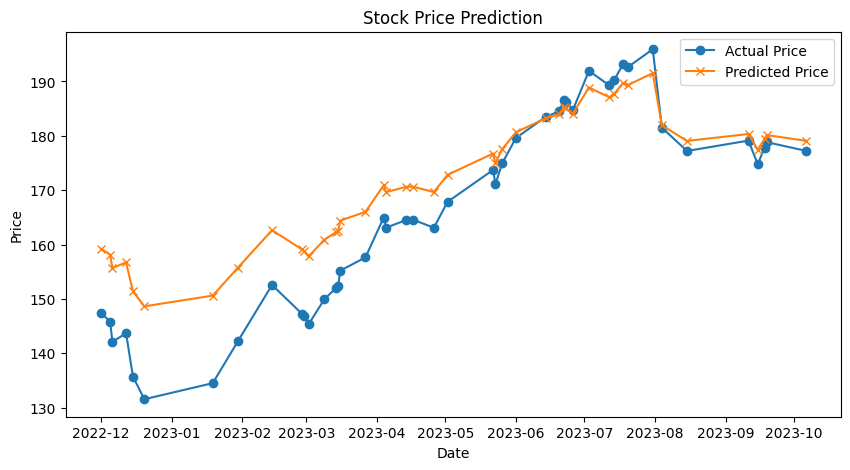

In [10]:
X = df[['Price']][:-30]  # all rows of the DataFrame except the last 30
y = df['Prediction'][:-30]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_test = X_test.sort_index()

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and plot
predicted_prices = model.predict(X_test)
predicted_df = pd.DataFrame(predicted_prices, index=X_test.index, columns=['Predicted Price'])

plt.figure(figsize=(10, 5))
plt.plot(X_test['Price'], label='Actual Price', marker='o')
plt.plot(predicted_df['Predicted Price'], label='Predicted Price', marker='x')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()